In [48]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [49]:
Fraud_check=pd.read_csv("Fraud_check.csv")
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [50]:
Fraud_check.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [51]:
Fraud_check.tail(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [52]:
Fraud_check=Fraud_check.rename(columns={"Marital.Status":"Marital_Status","Taxable.Income":"Taxable_Income","City.Population":"City_Population","Work.Experience":"Work_Experience"})

In [53]:
Fraud_check

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [54]:
#Creating dummy variables for below columns
Fraud_check=pd.get_dummies(Fraud_check,columns=["Undergrad","Marital_Status","Urban"],drop_first=True)

In [55]:
Fraud_check

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [56]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
Fraud_check["TaxInc"] = pd.cut(Fraud_check["Taxable_Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [57]:
Fraud_check=pd.get_dummies(Fraud_check,columns=["TaxInc"],drop_first=True)

In [58]:
Fraud_check.Taxable_Income.min()

10003

In [59]:
Fraud_check.Taxable_Income.max()

99619

In [60]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Fraud_check['TaxInc_Good']= label_encoder.fit_transform(Fraud_check['TaxInc_Good'])

In [61]:
Fraud_check

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


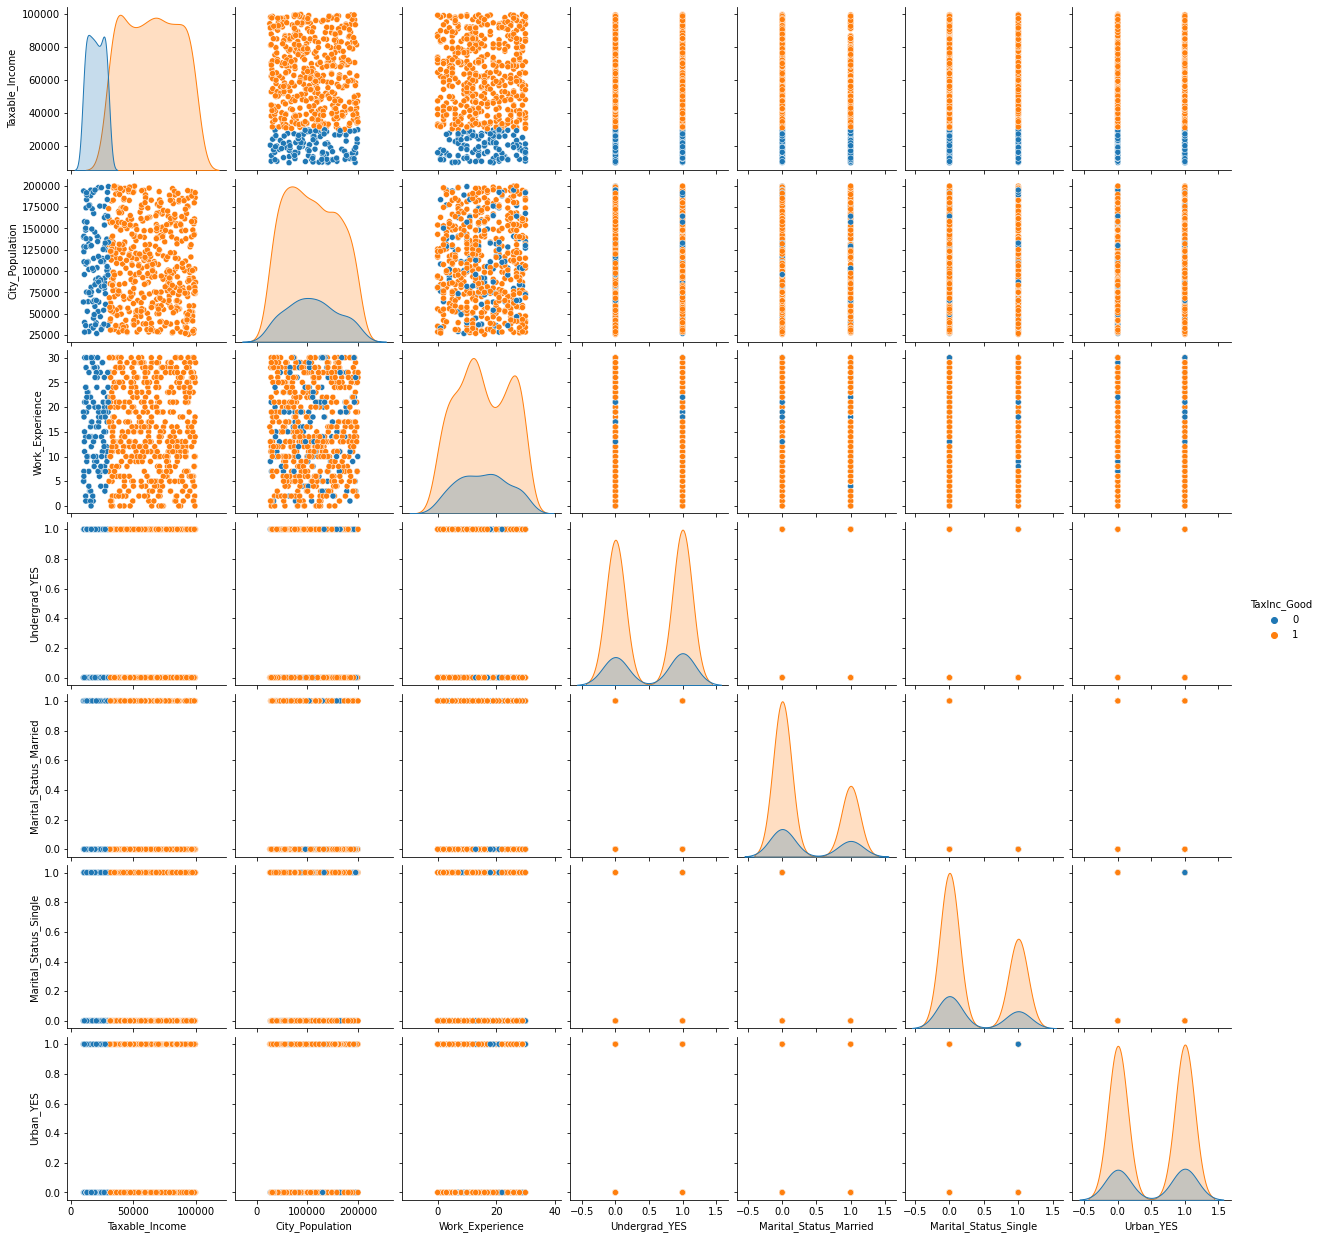

In [62]:
import seaborn as sns 
sns.pairplot(data=Fraud_check, hue="TaxInc_Good")

In [63]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Fraud_check.iloc[:,1:])
df_norm.tail(10)

,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [64]:
X=Fraud_check.iloc[:,0:7]
y=Fraud_check['TaxInc_Good']

In [65]:
X

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [66]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TaxInc_Good, Length: 600, dtype: int64

In [67]:
Fraud_check.TaxInc_Good.value_counts()

1    476
0    124
Name: TaxInc_Good, dtype: int64

In [68]:
colnames = list(Fraud_check.columns)
colnames

['Taxable_Income',
 'City_Population',
 'Work_Experience',
 'Undergrad_YES',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [69]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=42) 
X_train.shape, X_test.shape

((480, 7), (120, 7))

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [72]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [73]:
# checking the oob score
classifier_rf.oob_score_

0.9979166666666667

In [74]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [75]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [78]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [79]:
grid_search.best_score_

0.9979166666666667

In [80]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

[Text(0.5, 0.75, 'Taxable_Income <= 30192.0\ngini = 0.299\nsamples = 303\nvalue = [88, 392]\nclass = No TaxInc_Good'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 60\nvalue = [88, 0]\nclass = TaxInc_Good'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 243\nvalue = [0, 392]\nclass = No TaxInc_Good')]

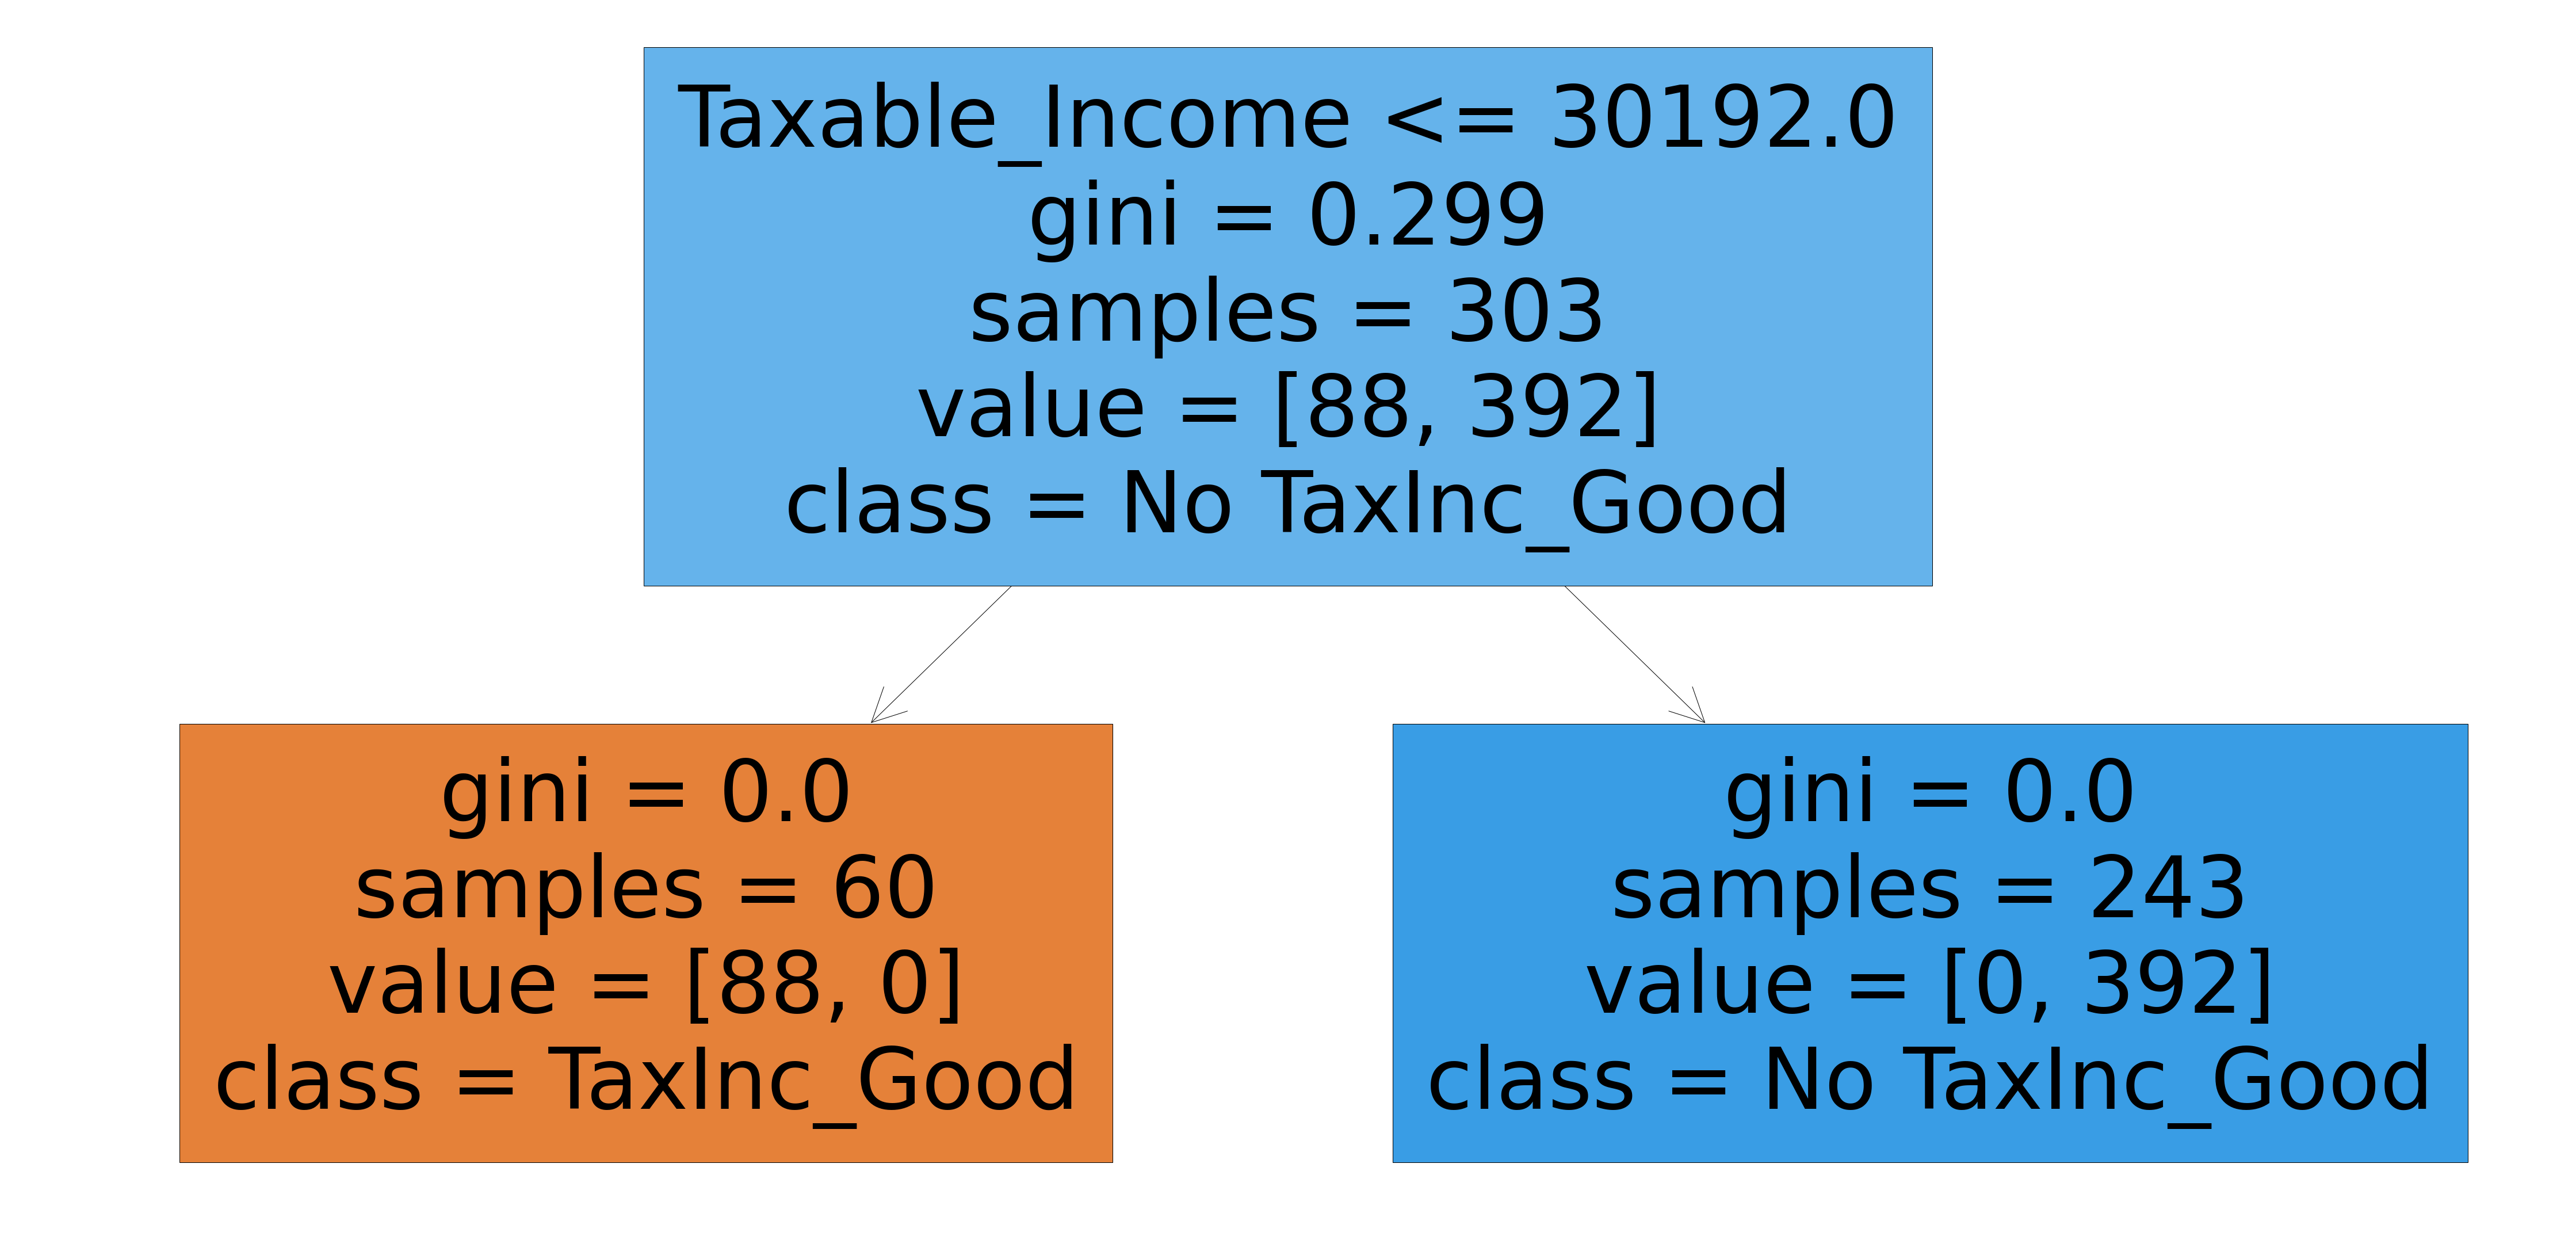

In [81]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['TaxInc_Good', "No TaxInc_Good"],filled=True)

In [82]:
rf_best.feature_importances_

array([0.6788074 , 0.12960729, 0.10893033, 0.01928744, 0.04235312,
       0.00168248, 0.01933193])

In [83]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [84]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,Taxable_Income,0.678807
1,City_Population,0.129607
2,Work_Experience,0.108930
4,Marital_Status_Married,0.042353
6,Urban_YES,0.019332
3,Undergrad_YES,0.019287
5,Marital_Status_Single,0.001682


In [85]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable_Income          600 non-null    int64
 1   City_Population         600 non-null    int64
 2   Work_Experience         600 non-null    int64
 3   Undergrad_YES           600 non-null    uint8
 4   Marital_Status_Married  600 non-null    uint8
 5   Marital_Status_Single   600 non-null    uint8
 6   Urban_YES               600 non-null    uint8
 7   TaxInc_Good             600 non-null    int64
dtypes: int64(4), uint8(4)
memory usage: 21.2 KB


In [86]:
array = Fraud_check.values
X=array[:,0:7]
y=array[:,7]

In [88]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

array = Fraud_check.values
X=array[:,0:7]
y=array[:,7]
num_trees = 500
max_features = 3 #Total features=9
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean()) 

0.9983333333333334


In [89]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
filename = 'Fraud_check.csv'
names = ['City_Population','Work_Experience','Undergrad_YES','Marital_Status_Married','Marital_Status_Single','Urban_YES','TaxInc_Good']
dataframe = read_csv(filename, names=names)

array = Fraud_check.values
X=array[:,0:7]
y=array[:,7]

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean()) 

0.9983333333333334


In [90]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
filename = 'Fraud_check.csv'
names = ['City_Population','Work_Experience','Undergrad_YES','Marital_Status_Married','Marital_Status_Single','Urban_YES','TaxInc_Good']
dataframe = read_csv(filename, names=names)
array = Fraud_check.values
X=array[:,0:7]
y=array[:,7]
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.9833333333333332
